<a href="https://colab.research.google.com/github/tpavan03/Phishing-Detection/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("PhiUSIIIL_Phishing_URL_Dataset.csv")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop([ 'FILENAME','Domain','TLD','URL', 'Title','label'], axis=1)  # Drop unnecessary columns
y = df['label']
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **DECISION TREE CLASSIFIER**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42,criterion="gini")

# Train the model
clf.fit(X_train, y_train)

# Calculate training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training Accuracy: 1.0000
Accuracy: 0.986592211267196
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     14538
         1.0       0.99      0.99      0.99     19845

    accuracy                           0.99     34383
   macro avg       0.99      0.99      0.99     34383
weighted avg       0.99      0.99      0.99     34383

Confusion Matrix:
[[14305   233]
 [  228 19617]]


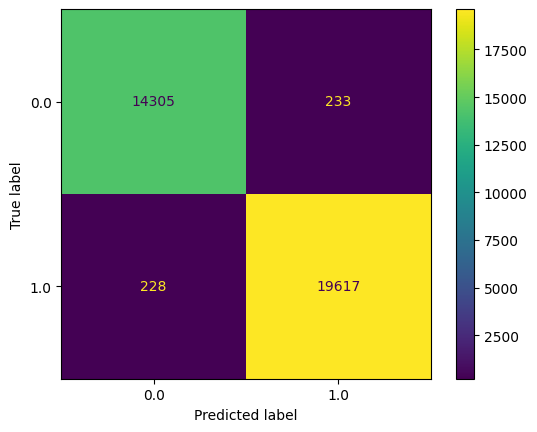

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot(values_format='d')
plt.show()

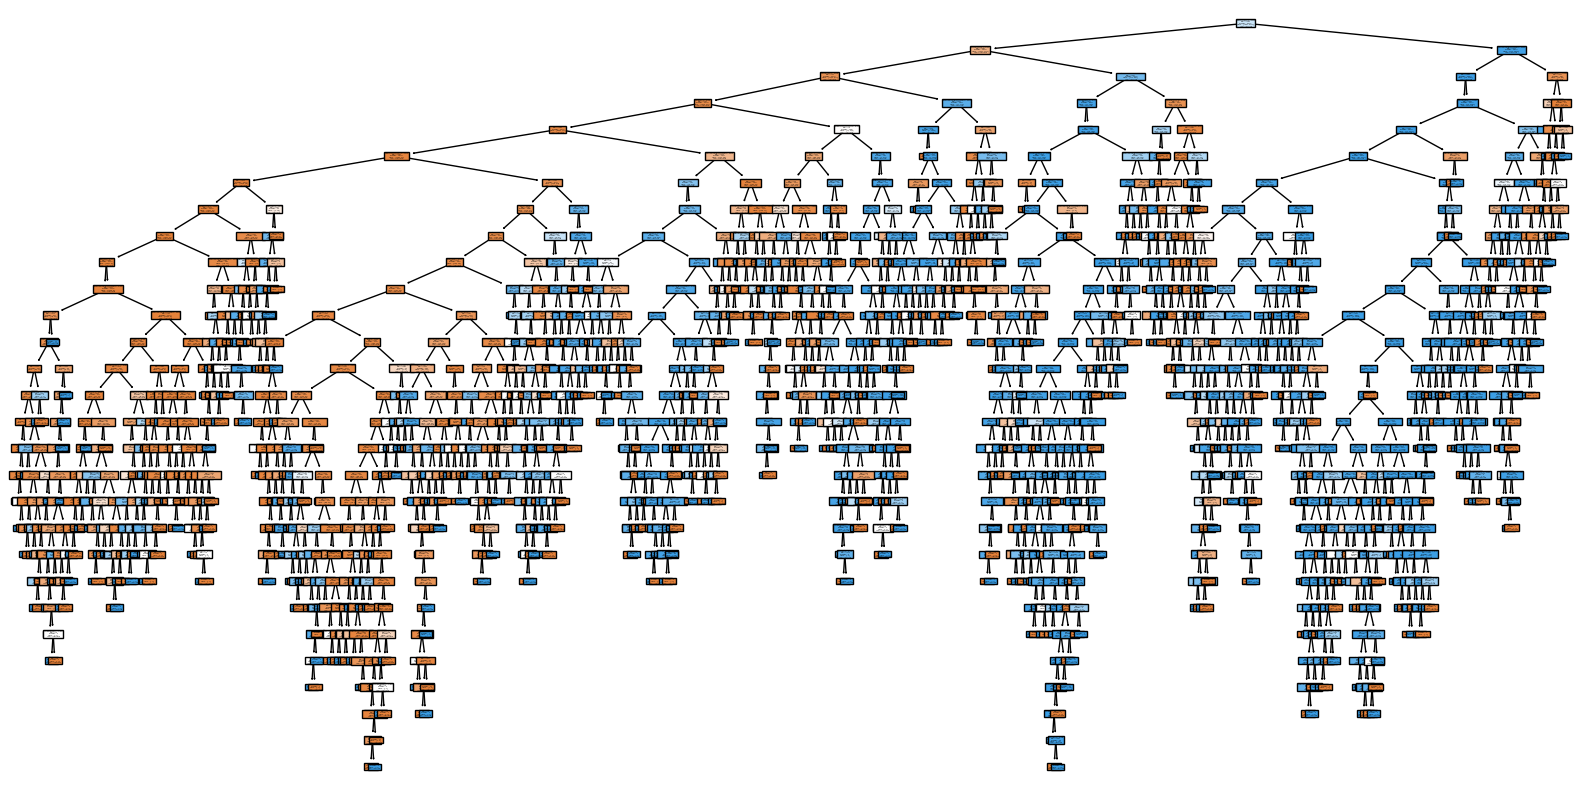

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Legitimate', 'Malicious'], filled=True)
plt.show()

**As the tree is pretty large,we can use some extra metrics such as max_depth ,min_samples_split etc..,We will find the best inputs for those parameters using Grid Search method as follows.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeClassifier object
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5) # 5-fold cross-validation

# Fit the grid search to our data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_dt_classifier = grid_search.best_estimator_

# Now we can use best_dt_classifier to make predictions

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


**We will use this metrics to form a new decision tree classifier and compare with the previous one.**

In [12]:
clf1= DecisionTreeClassifier(random_state=42,criterion="gini",max_depth = 10, min_samples_leaf = 1, min_samples_split = 5)

clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9797123780174628
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      4769
         1.0       0.98      0.98      0.98      6913

    accuracy                           0.98     11682
   macro avg       0.98      0.98      0.98     11682
weighted avg       0.98      0.98      0.98     11682

Confusion Matrix:
[[4659  110]
 [ 127 6786]]


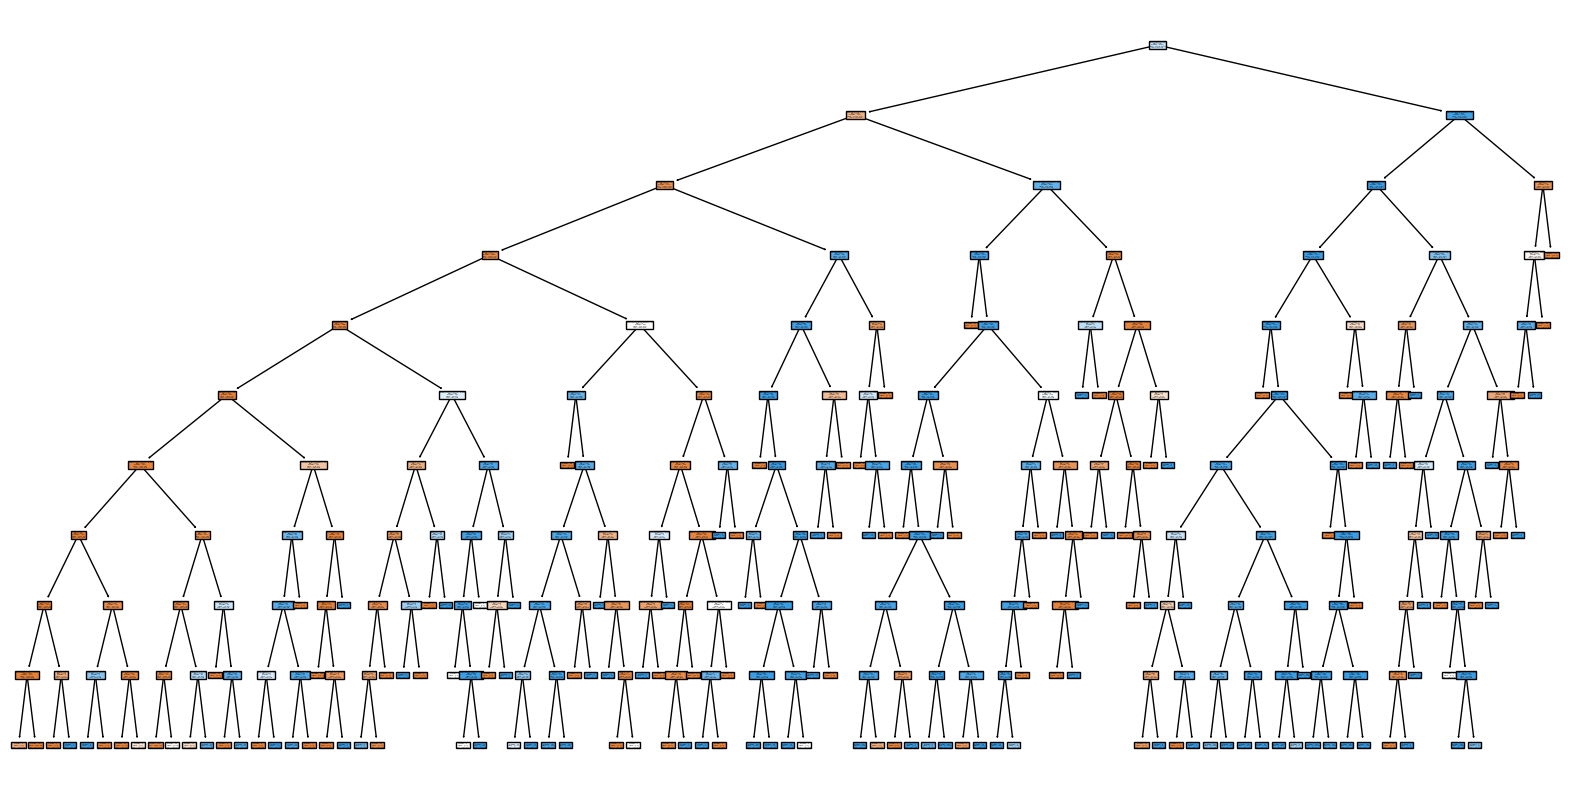

In [13]:
# Visualize the new decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf1, feature_names=X.columns, class_names=['Legitimate', 'Malicious'], filled=True)
plt.show()

**We observed that the new decision tree classifier has less accuracy than the previous DT model even after limiting depth.Thus, Our first DT model is the optimal one.**

# **RANDOM FOREST CLASSIFIER**

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create and Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Calculate training accuracy
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


# Make Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the Model (same as Decision Tree example)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training Accuracy: 1.0000
Accuracy: 0.9926

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14538
         1.0       0.99      1.00      0.99     19845

    accuracy                           0.99     34383
   macro avg       0.99      0.99      0.99     34383
weighted avg       0.99      0.99      0.99     34383


Confusion Matrix:
[[14371   167]
 [   89 19756]]


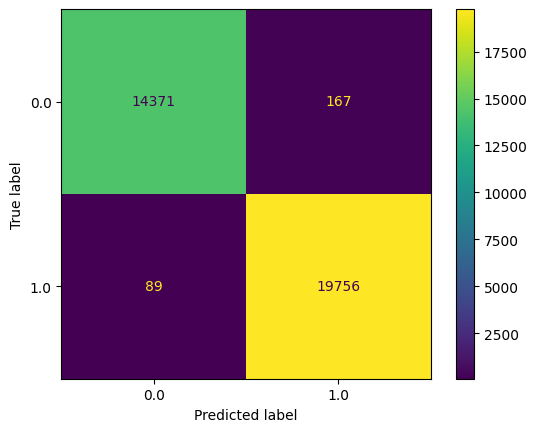

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)

disp.plot(values_format='d')
plt.show()

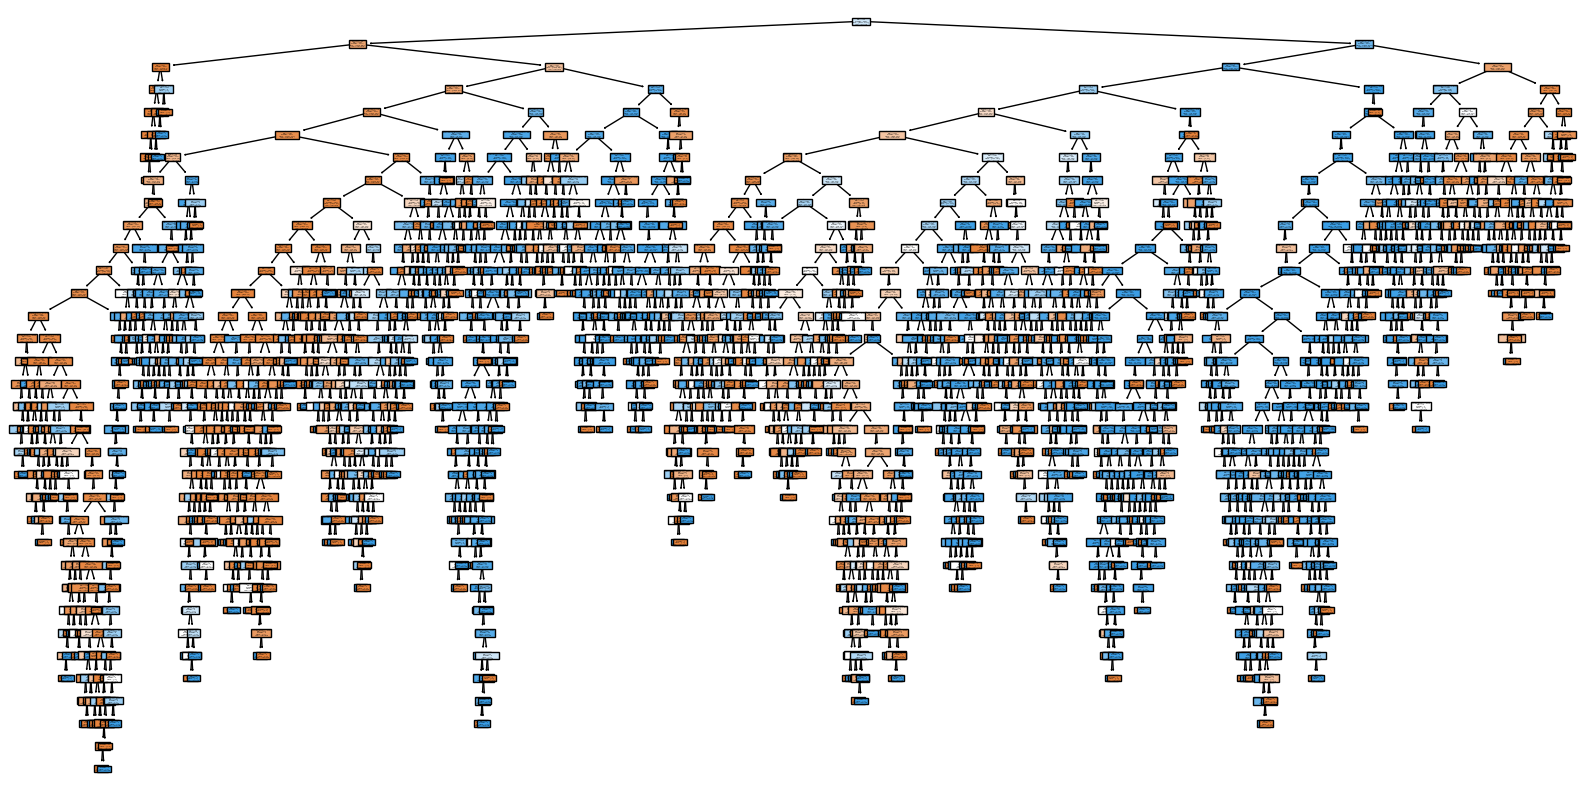

In [ ]:
# Visualize the random forest
plt.figure(figsize=(20,10))
tree.plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=['Legitimate', 'Malicious'], filled=True)
plt.show()

**Now, as we did with the decision tree classifier we will check with Random Forest classifier too incase there is overfitting in the model by adding some fixed parameters like max_depth,min_samples_leaf,min_samples_split.**

In [ ]:
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10,min_samples_leaf = 1, min_samples_split = 5)
rf_classifier1.fit(X_train, y_train)

y_pred = rf_classifier1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9865

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     14538
         1.0       0.99      0.99      0.99     19845

    accuracy                           0.99     34383
   macro avg       0.99      0.99      0.99     34383
weighted avg       0.99      0.99      0.99     34383


Confusion Matrix:
[[14287   251]
 [  213 19632]]


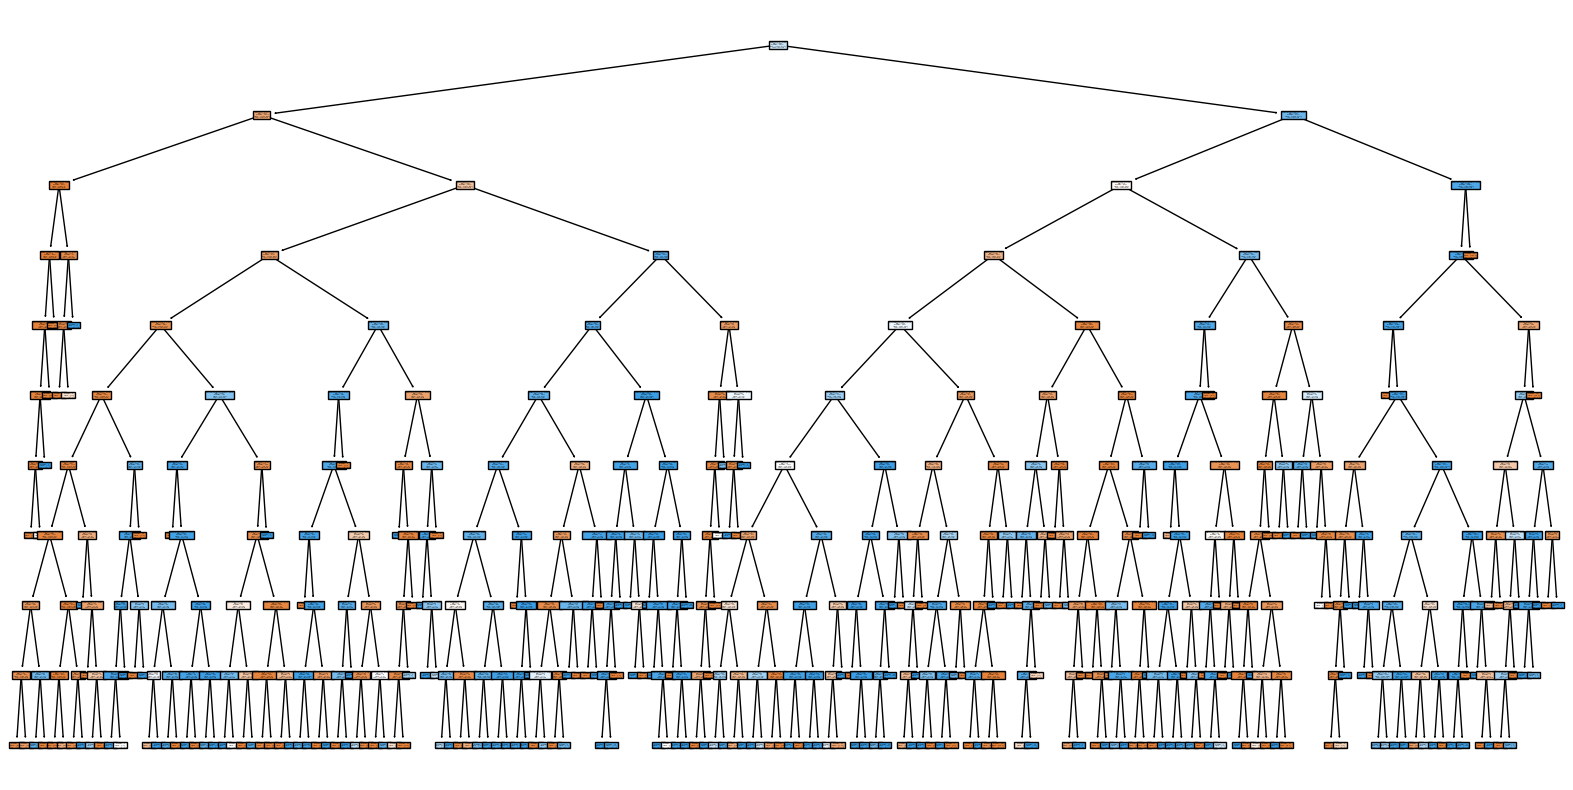

In [ ]:
# Visualize the new random forest
plt.figure(figsize=(20,10))
tree.plot_tree(rf_classifier1.estimators_[0], feature_names=X.columns, class_names=['Legitimate', 'Malicious'], filled=True)
plt.show()

**As we can observe the new random forest model with some fixed parameteres has produces less accuracy than the old model without any restriction parameters.Thus,Our first RandomForest classifier is an optimal model.**

# **NEURAL** **NETWORKS** **IMPLEMENTATION**

In [15]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build the Neural Network Model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), # Input layer
    layers.Dense(128, activation='relu'),    # Hidden layer 1
    layers.Dense(64, activation='relu'),    # Hidden layer 2
    layers.Dense(32, activation='relu'),    # Hidden layer 3
    layers.Dense(16, activation='relu'),     # Hidden layer 4
    layers.Dense(8, activation='relu'),     # Hidden layer 5
    layers.Dense(1, activation='sigmoid')   # Output layer (sigmoid for binary classification)
])
# Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#  Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Make Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to class labels

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Epoch 1/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9373 - loss: 0.1477 - val_accuracy: 0.9850 - val_loss: 0.0440
Epoch 2/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9866 - loss: 0.0417 - val_accuracy: 0.9873 - val_loss: 0.0405
Epoch 3/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9875 - loss: 0.0358 - val_accuracy: 0.9862 - val_loss: 0.0429
Epoch 4/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9895 - loss: 0.0314 - val_accuracy: 0.9906 - val_loss: 0.0332
Epoch 5/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0250 - val_accuracy: 0.9912 - val_loss: 0.0304
Epoch 6/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9922 - loss: 0.0213 - val_accuracy: 0.9912 - val_loss: 0.0282
Epoch 7/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9950 - loss: 0.0165 - val_accuracy: 0.9905 - val_loss: 0.0297
Epoch 8/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9938 - loss: 0.0168 - val_accuracy: 0.

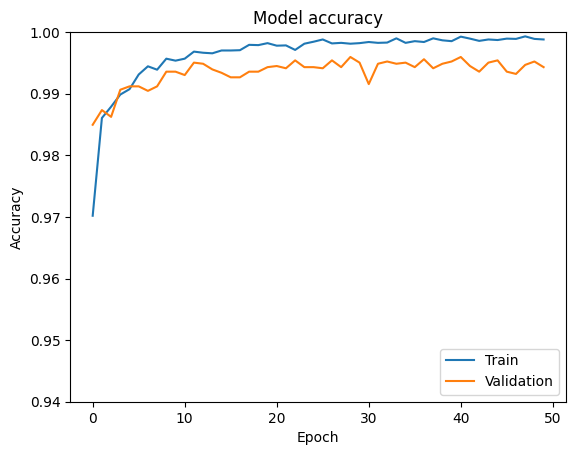

In [34]:
# Plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.ylim(0.94, 1)
plt.show()

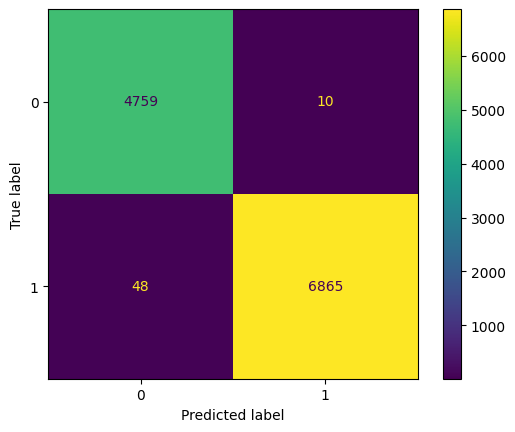

In [35]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

disp.plot(values_format='d')
plt.show()

In [36]:
# Visualise Neural Networks
!pip install pydot
!pip install graphviz
from keras.utils import plot_model

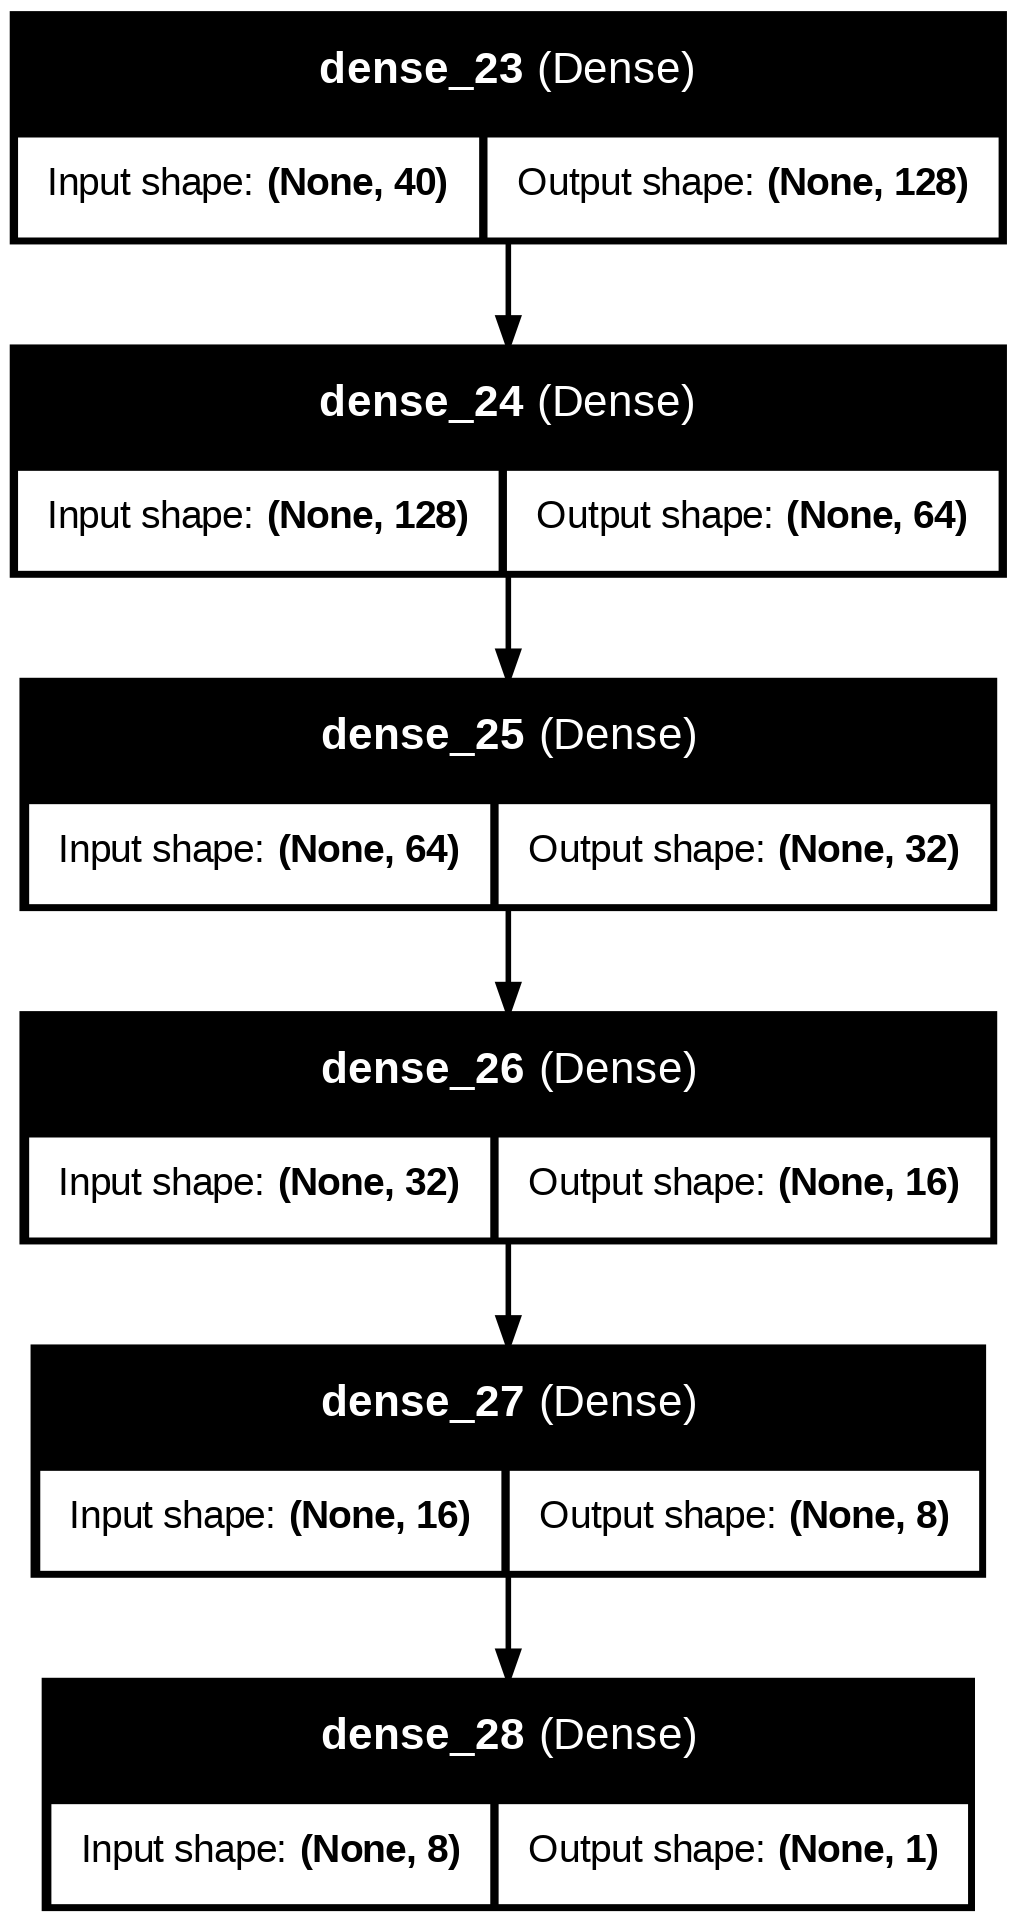

In [37]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)